# Raíces de funciones. Ceros de Funciones

In [30]:
%matplotlib inline

from math import ceil, log, sqrt
import matplotlib.pyplot as plt
from beautifultable import BeautifulTable
import scipy.optimize as opt
import numpy as np
import pandas as pd

## Métodos abiertos

### Método de Bisección

In [2]:
def bisection(func, x_a, x_b, error, table):
    if func(x_a) * func(x_b) >= 0:
        raise ValueError("The bisection method cannot be applied")

    # The bisection method
    while x_b - x_a > error:
        # calculate middle point
        x_m = (x_a + x_b) / 2

        table.append([x_a, x_b, x_m, func(x_a), func(x_b), func(x_m), x_b - x_a])

        if func(x_m) == 0:
            return x_m

        if func(x_a) * func(x_m) < 0:
            x_b = x_m
        else:
            x_a = x_m

    table.append([x_a, x_b, (x_a + x_b) / 2, func(x_a), func(x_b), func(x_m), x_b - x_a])

    return (x_a + x_b) / 2

#### Ejercicio

$$f(x) = x^3 + 4 x^2 - 10$$

In [4]:
func = lambda x: x ** 3 + 4 * x ** 2 - 10

#### Tiempos

In [6]:
bisection(func, 1, 2, 0.001)  # own function

1.36474609375

In [7]:
opt.bisect(func, 1, 2, xtol=0.001)  # scipy function

1.3642578125

In [9]:
f'Raíz: {bisection(func, 1, 2, 0.001, table:=[])}'

'Raíz: 1.36474609375'

In [6]:
table = np.array(table)

In [7]:
pd.DataFrame(table, columns=['x_a', 'x_b', 'x_m', 'f(x_a)', 'f(x_b)', 'f(x_m)', 'tramo'])

,x_a,x_b,x_m,f(x_a),f(x_b),f(x_m),tramo
0,1.000000,2.000000,1.500000,-5.000000,14.000000,2.375000,1.000000
1,1.000000,1.500000,1.250000,-5.000000,2.375000,-1.796875,0.500000
2,1.250000,1.500000,1.375000,-1.796875,2.375000,0.162109,0.250000
3,1.250000,1.375000,1.312500,-1.796875,0.162109,-0.848389,0.125000
4,1.312500,1.375000,1.343750,-0.848389,0.162109,-0.350983,0.062500
5,1.343750,1.375000,1.359375,-0.350983,0.162109,-0.096409,0.031250
6,1.359375,1.375000,1.367188,-0.096409,0.162109,0.032356,0.015625
7,1.359375,1.367188,1.363281,-0.096409,0.032356,-0.032150,0.007812
8,1.363281,1.367188,1.365234,-0.032150,0.032356,0.000072,0.003906
9,1.363281,1.365234,1.364258,-0.032150,0.000072,-0.016047,0.001953


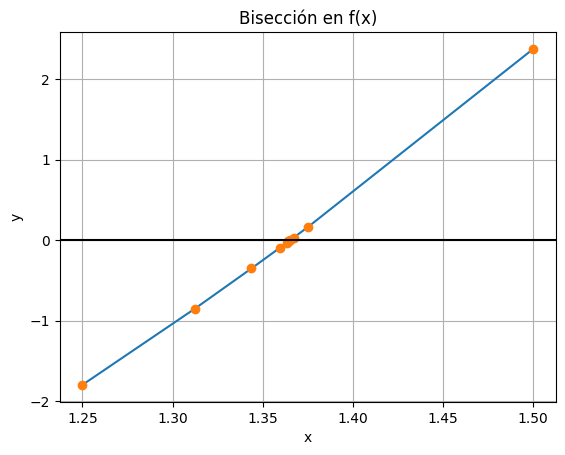

In [8]:
xi = table[:, 2]
yi = table[:, 5]

orden = np.argsort(xi)
xi = xi[orden]
yi = yi[orden]


plt.plot(xi, yi)
plt.plot(xi,yi,'o')
plt.axhline(0, color="black")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bisección en f(x)')
plt.grid()
plt.show()

### Método de Falsa Posición

In [189]:
def regula_falsi(func, a, b, error_total, table):
    error = np.abs(b - a)
    f_a = func(a)
    f_b = func(b)

    while error > error_total:
        x_i = b - f_b * (a - b) / (f_a - f_b)
        f_x_i = func(x_i)

        table.append([a, b, x_i, f_a, f_b, f_x_i, error])

        c = np.sign(f_a) * np.sign(f_x_i)

        if c >  0:
            error = np.abs(x_i - a)
            a = x_i
            f_a = f_x_i
        else:
            error = np.abs(b - x_i)
            b = x_i
            f_b = f_x_i

    table.append([a, b, x_i, f_a, f_b, f_x_i, error])

    return x_i

#### Ejercicio

$$f(x) = \cos{2x} - x^2$$

Dada $f(x) = \cos{2x} - x^2$ y sabiendo que la raíz se encuentra en el intervalo (0, 0.5). Encontrar un valor aproximado de la raíz. $e = 0.0001$

In [180]:
f_x = lambda x: np.cos(2 * x) - x ** 2

In [191]:
root = regula_falsi(f_x, 0, 0.5, 0.0001, table:=[])

In [192]:
f'Raíz: {root}'

'Raíz: 0.6007685997975323'

In [193]:
table = np.array(table)
pd.DataFrame(table, columns=['a', 'b', 'x_i', 'f(a)', 'f(b)', 'f(x_i)', 'error'])

,a,b,x_i,f(a),f(b),f(x_i),error
0,0.000000,0.500000,0.704525,1.000000,0.290302,-0.335315,0.500000
1,0.000000,0.704525,0.527610,1.000000,-0.335315,0.214664,0.204525
2,0.527610,0.704525,0.596662,0.214664,-0.335315,0.012565,0.527610
3,0.596662,0.704525,0.600558,0.012565,-0.335315,0.000646,0.069052
4,0.600558,0.704525,0.600758,0.000646,-0.335315,0.000033,0.003896
5,0.600758,0.704525,0.600769,0.000033,-0.335315,0.000002,0.000200
6,0.600769,0.704525,0.600769,0.000002,-0.335315,0.000002,0.000010


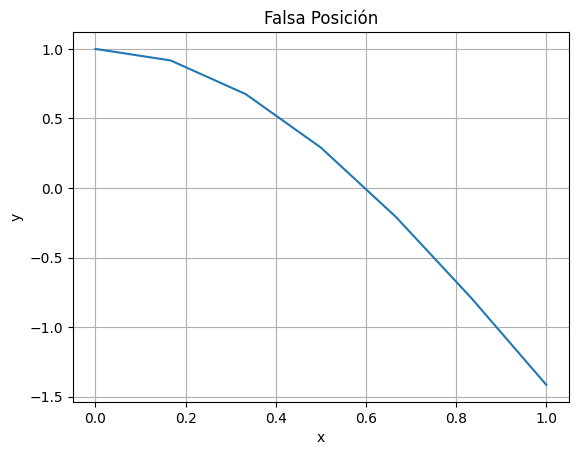

In [197]:
xi = np.linspace(0, 1, len(table))

plt.plot(xi, f_x(xi))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Falsa Posición')

plt.grid()
plt.show()

## Métodos cerrados

### Método de punto fijo

In [42]:
def fixed_point(g_x, x0, error_total, table):
    error = 1
    x_a = sum(x0) / 2
    while (error >= error_total):
        x_i = g_x(x_a)
        error = np.abs((x_i - x_a) / x_i)
        table.append([x_a, x_i, error * 100])
        x_a = x_i
    return x_a

#### Ejercicio

$$f(x) = 4x^2 + x^3 - 10$$
$$4 x^2 + x^3 - 10 = 0$$
$$g(x) = \sqrt{\frac{10 - x^3}{4}}$$

Intervalo de confianza:
$$f(1) = -5$$
$$f(2) = 14$$
$$x_a = \frac{1 + 2}{2} = 1.5$$

Convergencia:
$$g'(x) = - \frac{3x^2}{4 \sqrt{10 - x^3}}$$
$$|g'(1.5)| = |-0.655| < 1$$

In [61]:
f_x = lambda x: 4 * x ** 2 + x ** 3 - 10
g_x = lambda x: np.sqrt((10 - x ** 3) / 4)

In [62]:
root = fixed_point(g_x, [1, 2], 10e-6, table := [])

In [63]:
f'Raíz: {root}'

'Raíz: 1.3652332557424998'

In [64]:
table = np.array(table)

In [65]:
pd.DataFrame(table, columns=['x_a', 'x_i', 'error'])

,x_a,x_i,error
0,1.500000,1.286954,16.554303
1,1.286954,1.402541,8.241260
2,1.402541,1.345458,4.242601
3,1.345458,1.375170,2.160596
4,1.375170,1.360094,1.108457
5,1.360094,1.367847,0.566787
6,1.367847,1.363887,0.290344
7,1.363887,1.365917,0.148598
8,1.365917,1.364878,0.076089
9,1.364878,1.365410,0.038951


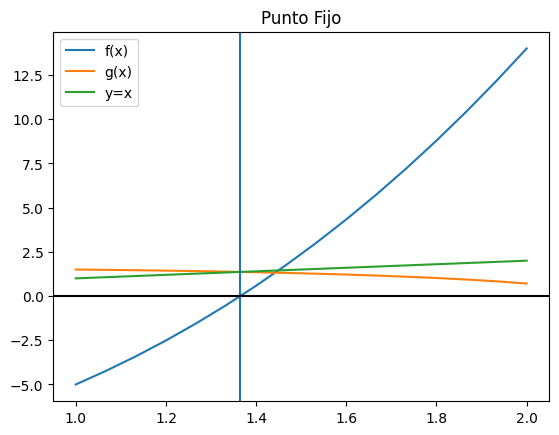

In [66]:
xi = np.linspace(1, 2, len(table))
fi = f_x(xi)
gi = g_x(xi)
yi = xi

plt.plot(xi, fi, label='f(x)')
plt.plot(xi ,gi, label='g(x)')
plt.plot(xi, yi, label='y=x')
plt.axvline(root)

plt.axhline(0, color='k')
plt.title('Punto Fijo')
plt.legend()
plt.show()

### Método de Newton - Raphson

In [210]:
def newton_raphson(fx, dfx, x0, error_total, table):
    error = np.abs(2 * error_total)
    x_i = x0
    while error >= error_total:
        x_ip1 = x_i - fx(x_i) / dfx(x_i)
        error = np.abs((x_ip1 - x_i) / x_ip1)

        table.append([x_i, x_ip1, error])

        x_i = x_ip1

    return x_i

#### Ejercicio

$$f(x) = \frac{1}{e^x} - x$$
$$f'(x) = - e^{-x} - 1$$

Dada la función $f(x) = \frac{1}{e^x} - x$ obtener una raíz aproximada, con el método **Newton - Raphson**. Valor inicial $x_0 = 0$ y $e = 0.0001$.

In [233]:
fx = lambda x: np.exp(-x) - x
dfx = lambda x: - np.exp(-x) - 1

In [234]:
root = newton_raphson(fx, dfx, 0, 0.0001, table:=[])

In [235]:
f'Raíz: {root}'

'Raíz: 0.5671432904097811'

In [236]:
fx(root)

4.440892098500626e-15

In [237]:
table = np.array(table)
pd.DataFrame(table, columns=['x_i', 'x_i + 1', 'error'])

,x_i,x_i + 1,error
0,0.000000,0.500000,1.000000e+00
1,0.500000,0.566311,1.170929e-01
2,0.566311,0.567143,1.467287e-03
3,0.567143,0.567143,2.210639e-07


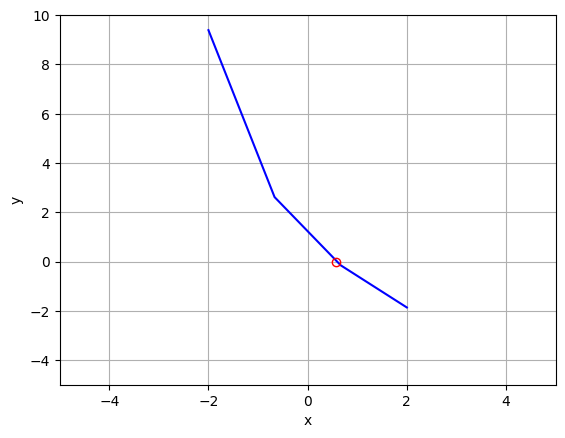

In [238]:
x_plot = np.linspace(-2, 2, len(table))
y_plot = fx(x_plot)

plt.plot(x_plot, y_plot, c='blue')
plt.plot(root, fx(root), c='red', marker='o', fillstyle='none')

plt.xlim([-5, 5])
plt.ylim([-5, 10])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Método de la Secante

#### Ejercicio